In [0]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0  

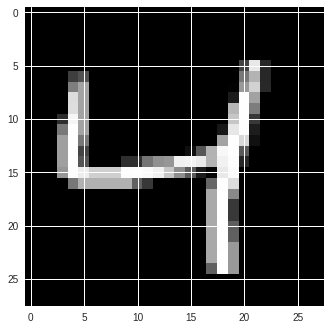

In [0]:
plt.imshow(X_train[2],cmap=plt.get_cmap('gray'))
print(X_train[2].shape)
print(X_train[2])

In [0]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [0]:
seed=100
np.random.seed(seed)

In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')  #(samples,pixel,width,height)
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

In [0]:
X_train = X_train/255
X_test = X_test/255
#one-hot encode
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_class = Y_train.shape[1]
print(num_class)
print(Y_train[2])
Y_train

10
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
def baseline_model():
  model = Sequential()
  model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(num_class, activation='softmax'))
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [0]:
#build the model
model=baseline_model()
#fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=1)
#final evaluation of model
score = model.evaluate(X_test,Y_test,verbose=1)
print("CNN Error: %.2f%%" % (100-score[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 48s 802us/step - loss: 0.2593 - acc: 0.9242 - val_loss: 0.0845 - val_acc: 0.9743
Epoch 2/10
60000/60000 [==============================] - 48s 792us/step - loss: 0.0780 - acc: 0.9768 - val_loss: 0.0536 - val_acc: 0.9820
Epoch 3/10
60000/60000 [==============================] - 47s 788us/step - loss: 0.0548 - acc: 0.9835 - val_loss: 0.0457 - val_acc: 0.9849
Epoch 4/10
60000/60000 [==============================] - 48s 793us/step - loss: 0.0434 - acc: 0.9863 - val_loss: 0.0407 - val_acc: 0.9868
Epoch 5/10
 5200/60000 [=>............................] - ETA: 40s - loss: 0.0292 - acc: 0.9923

In [0]:
import cv2
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
#prediction
X_test[4].reshape(28,28)
test=X_test[4]
print(test.shape)

plt.imshow(test,cmap=plt.get_cmap('gray'))
test=test.reshape(1,28,28,1)
print(test.shape)
print(model.predict(test))
